Problema Escolhido:
Previsão de evasão escolar com base em características dos alunos

Justificativa do Problema:
A evasão escolar é um dos principais desafios da educação no Brasil. Milhares de estudantes deixam a escola antes de completar o ensino básico ou médio, comprometendo seu futuro profissional e contribuindo para o aumento da desigualdade social. Com o uso de dados educacionais, é possível identificar padrões entre os alunos que mais abandonam os estudos, permitindo a criação de ações preventivas por parte de escolas, governos e ONGs.



Fonte de Dados
Dataset utilizado: xAPI-Edu-Data.csv

Fonte: Kaggle - Student Dropout and Academic Success - https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [6]:

df = pd.read_csv("xAPI-Edu-Data.csv")

print(df.shape)
print(df.columns)
print(df.info())
print(df["Class"].value_counts())

(480, 17)
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation           

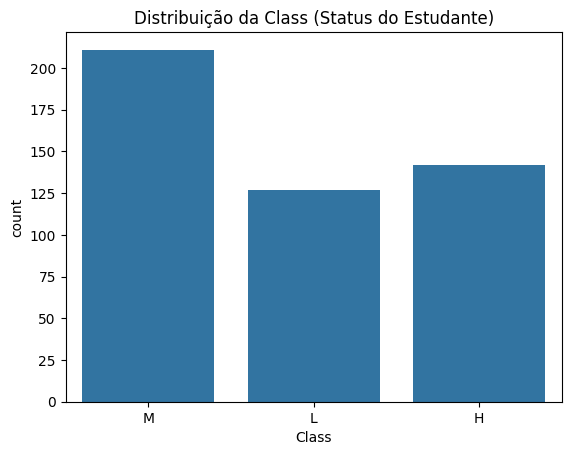

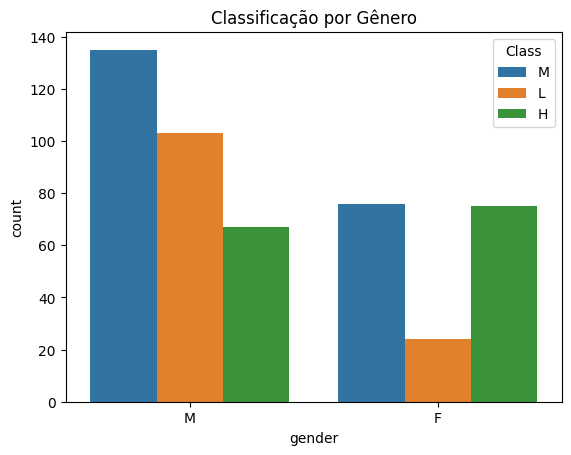

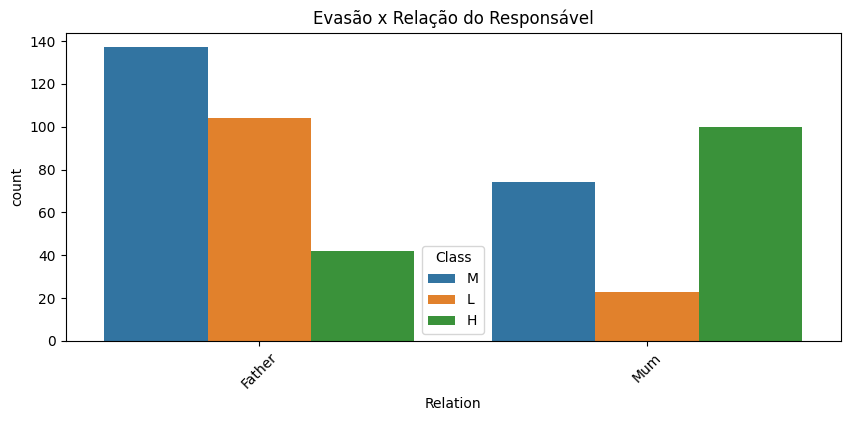

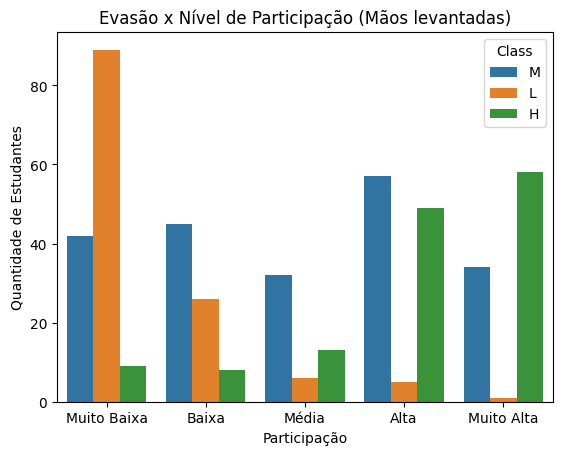

In [ ]:
sns.countplot(data=df, x='Class')
plt.title("Distribuição da Class (Status do Estudante)")
plt.show()

sns.countplot(data=df, x='gender', hue='Class')
plt.title("Classificação por Gênero")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Relation', hue='Class')
plt.title("Evasão x Relação do Responsável")
plt.xticks(rotation=45)
plt.show()


bins = [0, 20, 40, 60, 80, 100]
labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']
df['participacao'] = pd.cut(df['raisedhands'], bins=bins, labels=labels, right=False)

sns.countplot(data=df, x='participacao', hue='Class')
plt.title("Evasão x Nível de Participação (Mãos levantadas)")
plt.xlabel("Participação")
plt.ylabel("Quantidade de Estudantes")
plt.show()

Principais Pontos Relevantes para a Solução
Variável	Justificativa
raisedhands	Indica o nível de engajamento em aula. Participação baixa está ligada à evasão.
VisITedResources	Mostra o interesse do aluno por aprender fora da aula. Baixo acesso = maior risco.
Relation	Permite entender se a figura responsável influencia o desempenho escolar.
Class	Variável alvo, usada para treinar o modelo e prever casos futuros.

A partir da análise exploratória, podemos identificar que nível de participação em aula, acesso a recursos educacionais e relação com o responsável são fatores diretamente associados ao risco de evasão escolar. Esses insights orientam as decisões de engenharia de variáveis e servirão como base para a modelagem preditiva na próxima etapa do projeto.

In [13]:
# Transformar a variável alvo em binária: 1 = evasão (L), 0 = não evasão (M ou H)
data = df.copy()

data['evasao'] = data['Class'].apply(lambda x: 1 if x == 'L' else 0)

# Selecionar colunas relevantes
features = ['raisedhands', 'VisITedResources', 'Discussion', 
            'Relation', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

# Codificar variáveis categóricas
for col in ['Relation', 'ParentschoolSatisfaction', 'StudentAbsenceDays']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Divisão em X e y
X = data[features]
y = data['evasao']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.83      0.87      0.85        45

    accuracy                           0.90       144
   macro avg       0.88      0.89      0.89       144
weighted avg       0.90      0.90      0.90       144



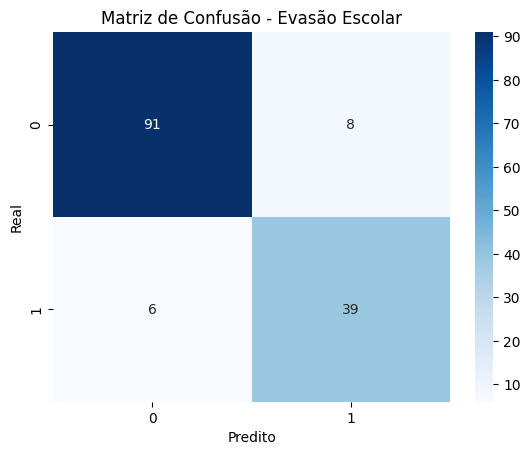

In [14]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Evasão Escolar")
plt.show()

O modelo foi treinado com Random Forest e avaliado usando:

Precisão (precision): quantos dos alunos previstos como evasores realmente evadiram.

Revocação (recall): quantos dos evasores reais foram corretamente identificados.

F1-score: equilíbrio entre precisão e recall.

A matriz de confusão mostra:

Verdadeiros positivos: evasores corretamente previstos

Falsos positivos: não evasores previstos como evasores

Verdadeiros negativos e falsos negativos

Importante: O foco é um bom recall para a classe de evasão (1) — é melhor errarmos por excesso do que deixar passar um evasor real sem previsão.


Foi construído um modelo preditivo capaz de identificar estudantes com alto risco de evasão escolar com base em variáveis comportamentais e socioeducacionais. O modelo apresentou desempenho satisfatório com a Random Forest, sendo avaliado por métricas como precisão, recall e F1-score.

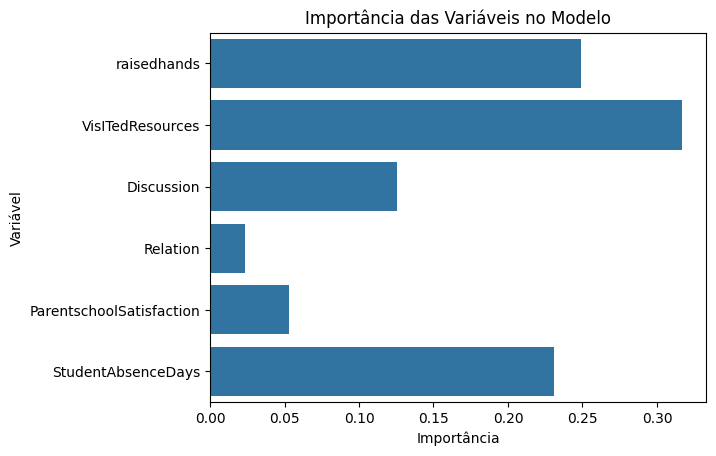

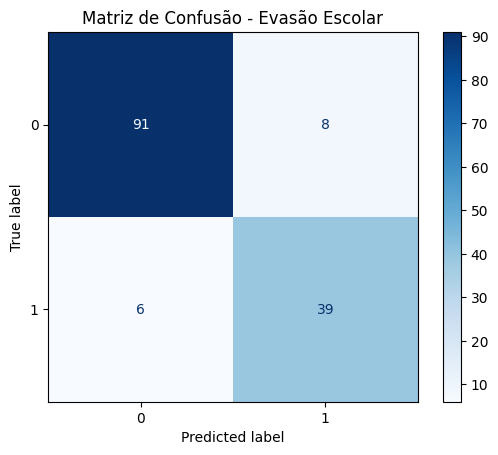

In [16]:
importances = modelo.feature_importances_
features_names = X.columns
sns.barplot(x=importances, y=features_names)
plt.title("Importância das Variáveis no Modelo")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusão - Evasão Escolar")
plt.show()